# Visualizing Attention Plots

In [1]:
import matplotlib.pyplot as plt
from jax import numpy as jnp
from jax import random

from wheeljax.model.positional_encoding import PositionalEncoding

In [2]:
init_rng = random.PRNGKey(seed=42)
init_rng, dropout_init_rng = random.split(init_rng, num=2)

In [3]:
model_dim = 32
seq_len = 20
pe = PositionalEncoding(model_dim=model_dim)

dummy_inputs = jnp.zeros((1, seq_len, model_dim))

params = pe.init(
    {"params": init_rng},
    inputs=dummy_inputs
)

# since our inputs are all zeros we get back the positional encoding
pe = pe.apply({"params": params}, inputs=dummy_inputs)

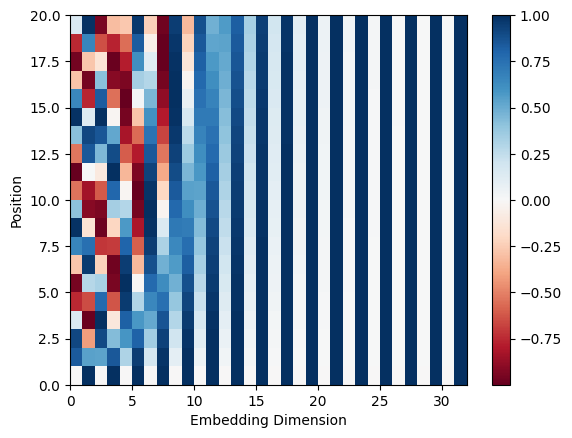

In [4]:
plt.pcolormesh(pe[0], cmap='RdBu')
plt.xlabel('Embedding Dimension')
plt.xlim((0, model_dim))
plt.ylabel('Position')
plt.colorbar()
plt.show()

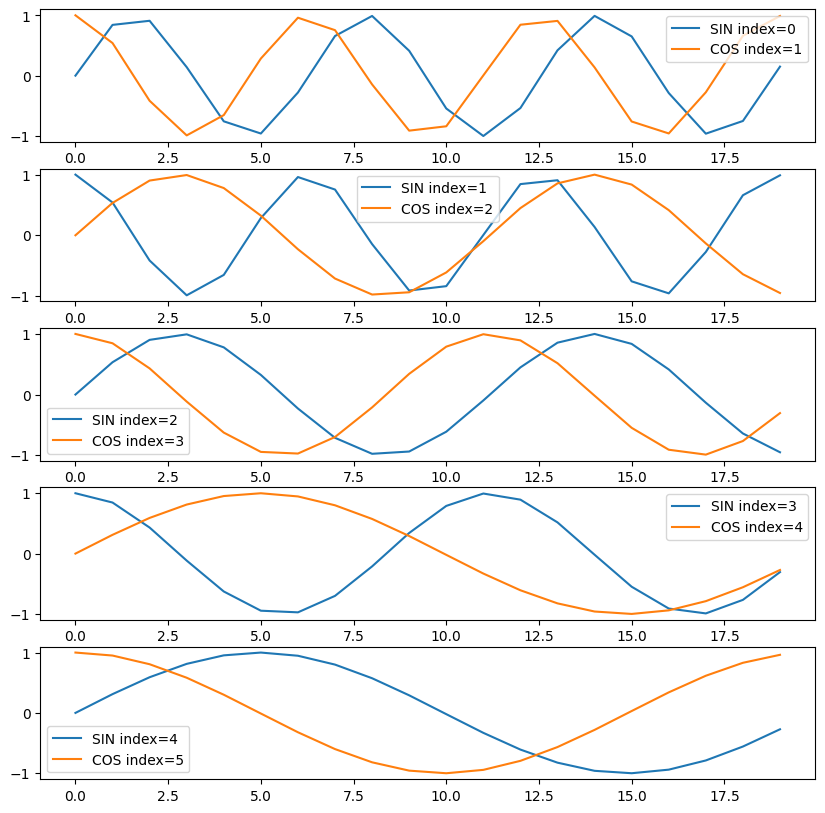

In [5]:
subplots = 5

plt.figure(figsize=(10, 10))

for i in range(subplots):
    plt.subplot(subplots, 1, i + 1)
    plt.plot(pe[0, :, i], label=f"SIN index={i}")
    plt.plot(pe[0, :, i + 1], label=f"COS index={i + 1}")
    plt.legend()

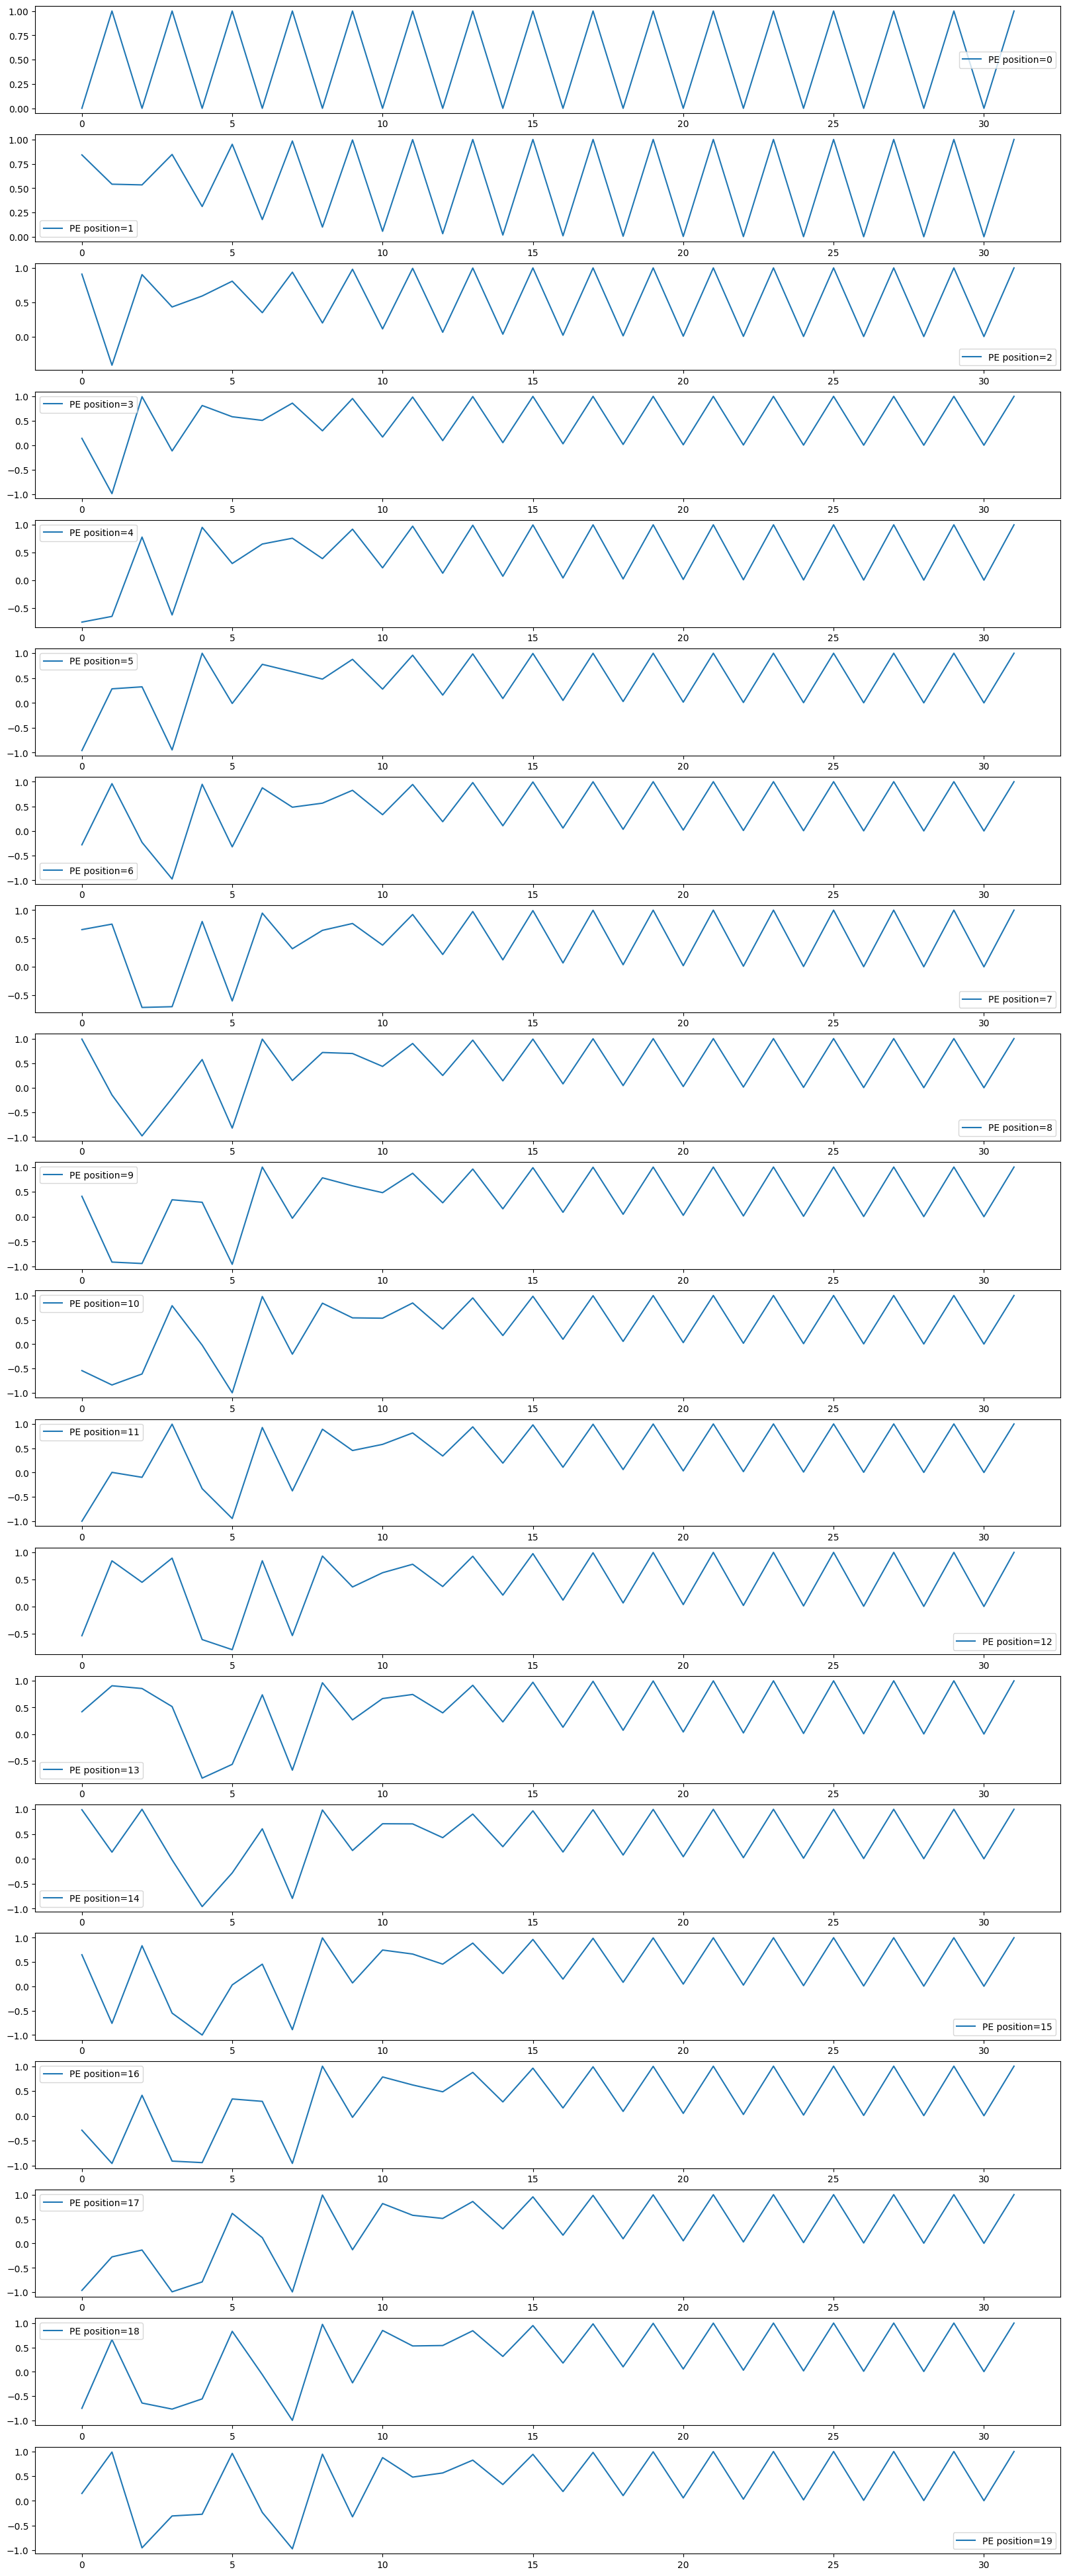

In [6]:
plt.figure(figsize=(20, 50))
for i in range(0, seq_len):
    plt.subplot(seq_len, 1, i + 1)
    plt.plot(pe[0, i, :], label=f"PE position={i}")
    plt.legend()